In [2]:
#DAY-1 (09/10/2024)
#setting up the Environment 
!python --version


Python 3.12.0


In [22]:
pip install torch


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
import torchvision

In [6]:
import torch
print(torch.__version__)


2.4.1+cpu


In [7]:
import torchvision
print(torchvision.__version__)


0.19.1+cpu


In [8]:
#Loading MNIST Dataset
train_data_set=torchvision.datasets.MNIST(root='./data', train=True, download=True )
# Load the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)


In [25]:
print(train_data_set)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


In [10]:
#DAY-2(10/10/2024)

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [15]:
#different pre-processing steps 
transform = transforms.Compose([
    transforms.Resize((32, 32)),          # Resize image to 32x32
    transforms.RandomHorizontalFlip(),    # Randomly flip the images horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  #Randomly changes the brightness, contrast
    transforms.ToTensor(),                # Converts images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to range [-1, 1]
])


In [16]:
# Loading the MNIST training dataset
train_data_set=datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Loading the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# Creating DataLoader for the training dataset
mnist_loader = DataLoader(dataset=train_data_set, batch_size=64, shuffle=True)
# Create DataLoader for the test dataset
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [17]:
data_iter = iter(mnist_loader)  #Creating the iterator
images, labels = next(data_iter) #to retrieve the next batch of images and labels from the iterator


In [26]:
# Function to display the images(Data Visualisation)
def show_img(images,labels):
    fig,axes=plt.subplots(4,5,figsize=(12,12))
    for i, axi in enumerate(axes.flatten()):
        axi.imshow(images[i].squeeze(), cmap='gray')
        axi.set_title("Label: "+str(labels[i].item()))
    plt.show()


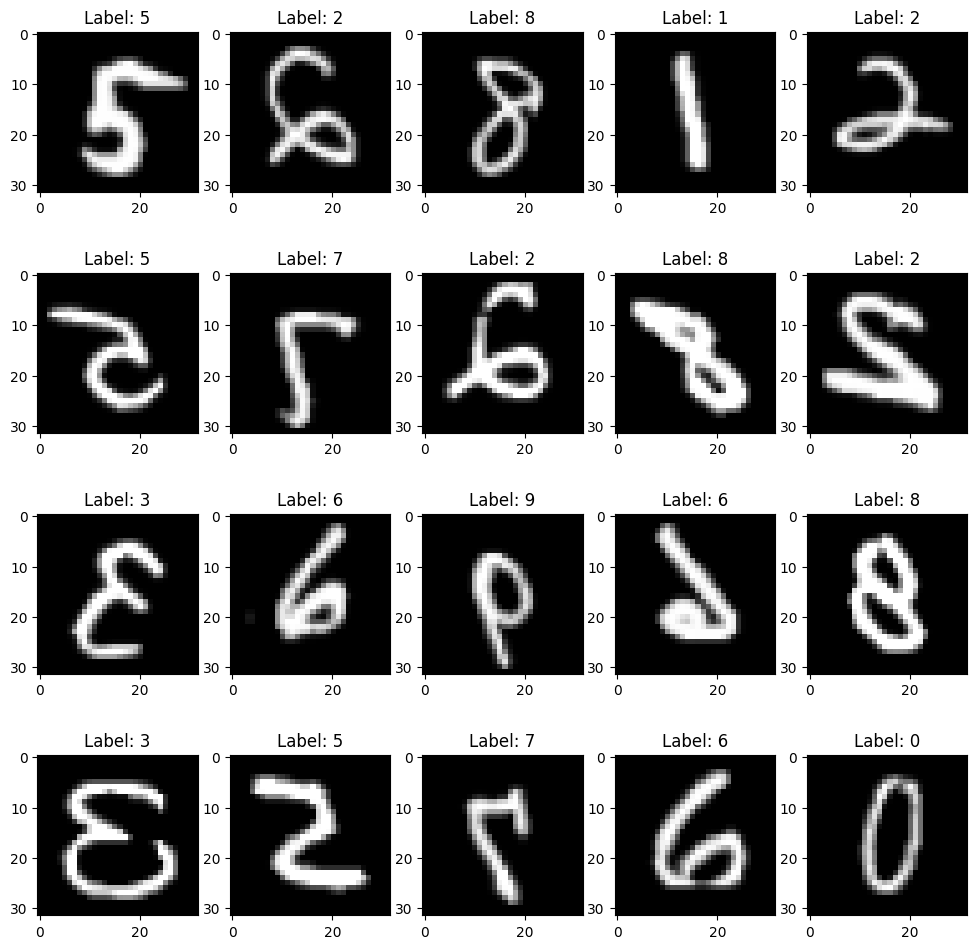

In [27]:
#Displaying the output
show_img(images,labels)